# 12 Day Program: Day 4
Analyzing the Value of Energy Cost Saving Program for businesses in New York City 

## Importing the required modules

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Uploading the data

In [2]:
vecsp_data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

## Question 1: How many different companies are represented in the data set?

In [3]:
# Checking information about given data
vecsp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [4]:
# Counting unique values of the company names
print('There are %s different companies represented in the data set.' % vecsp_data['Company Name'].nunique())

There are 439 different companies represented in the data set.


## Question 2: What is the total number of jobs created for businesses in Queens?

In [5]:
# Checking for Queens in the data to verify that it is uniquely spelled
vecsp_data['Borough'].unique()

array(['Brooklyn', 'New York', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
# A lot of them are NaN, will drop them for this exersize
jobs_created = sum(vecsp_data[vecsp_data['Borough']=='Queens']['Job created'].dropna())
print('The total number of jobs created for business in Queens is %s.' % int(jobs_created))

The total number of jobs created for business in Queens is 102.


## Question 3: How many different unique email domains names are there in the data set?

In [7]:
# First, let's create a new column that will conatin the email domains
vecsp_data['email domains'] = vecsp_data['company email'].dropna().apply(lambda el: el.split('@')[1].lower() if '@' in el else el)

In [9]:
print('There are %s different email domains represented in the data set.' %vecsp_data['email domains'].dropna().nunique())

There are 361 different email domains represented in the data set.


## Question 4: Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [10]:
# Let's create a new DataFrame groupped by NTA and count the items
by_NTA = vecsp_data.groupby('NTA').count()

In [11]:
savings = by_NTA[by_NTA['Company Name']>=5]['Total Savings']

In [12]:
jobs = by_NTA[by_NTA['Company Name']>=5]['Job created']

In [13]:
NTA_stats = pd.concat([savings, jobs], axis = 1, join = 'inner')

In [14]:
NTA_stats.head(20)

,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,9,0
Bushwick South,10,1
Carroll Gardens-Columbia Street-Red Hook,11,0
College Point,7,1
Crown Heights North,9,0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,0
East New York,9,1
East Williamsburg,11,0
Greenpoint,14,0


## Question 5: Save your result for the previous question as a CSV file.

In [15]:
NTA_stats.to_csv('NTA_AvergaeSavings_TotalJobs.csv')

# 12 Day Program: Day 5
Visualizing the data on the Value of Energy Cost Saving Program for businesses in New York City

## Question 1: make a scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

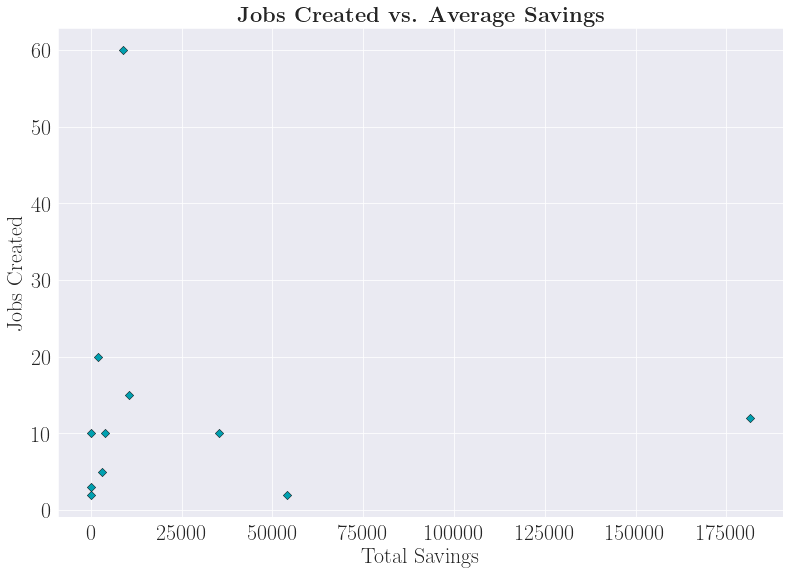

In [78]:
fig = plt.figure(figsize = (13,9))
fs = 22
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
sns.scatterplot(data = vecsp_data, x = 'Total Savings', y = 'Job created', s = 35, edgecolor = 'k', color = '#00a0b0', marker = 'D')
plt.xlabel(r'Total Savings', fontsize = fs)
plt.ylabel(r'Jobs Created', fontsize = fs)
plt.title(r'\bf{Jobs Created vs. Average Savings}', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs);

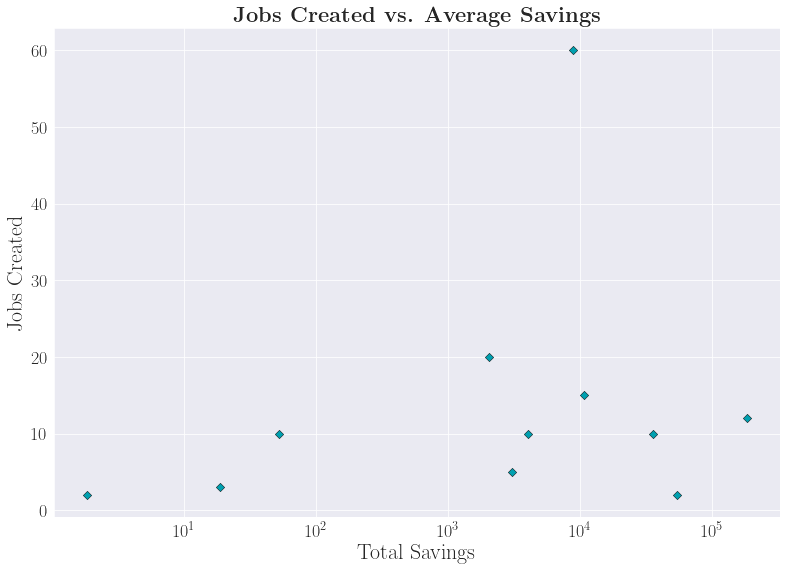

In [79]:
fig = plt.figure(figsize = (13,9))
sns.scatterplot(data = vecsp_data, x = 'Total Savings', y = 'Job created', s = 35, edgecolor = 'k', color = '#00a0b0', marker = 'D')
plt.xscale('log')
plt.xlabel(r'Total Savings', fontsize = 22)
plt.ylabel(r'Jobs Created', fontsize = 22)
plt.title(r'\bf{Jobs Created vs. Average Savings}', fontsize = 22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## Question 2: create a histogram of the log of the average total savings.

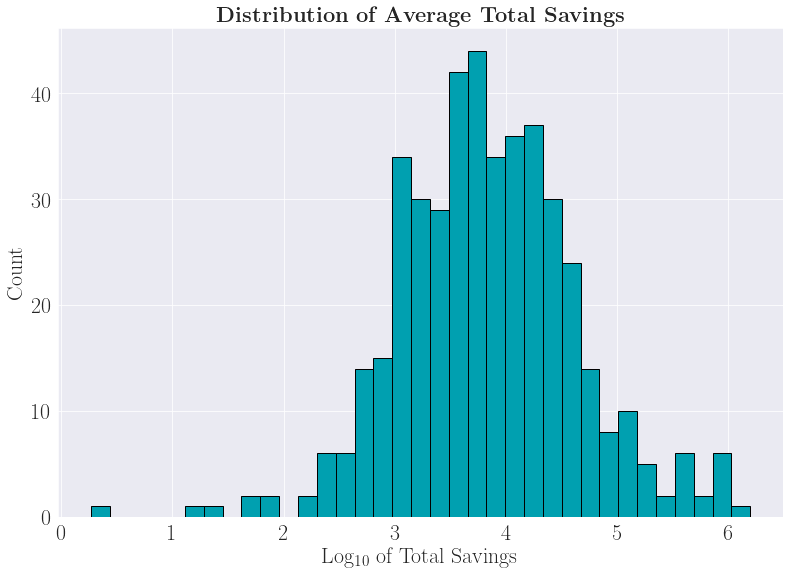

In [93]:
fig = plt.figure(figsize = (13,9))
vecsp_data['Total Savings'].apply(lambda x: np.log10(x) if np.isfinite(np.log10(x)) else np.nan).dropna().hist(bins = 35, edgecolor = 'k', color = '#00a0b0')
plt.title(r'\bf{Distribution of Average Total Savings}', fontsize = fs)
plt.xlabel(r'Log$_{10}$ of Total Savings', fontsize = fs)
plt.ylabel(r'Count', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs);

## Question 3: create a line plot of the total jobs created for each month.

In [94]:
# First we will convert the date column into datetime format
vecsp_data['Effective Date'] = pd.to_datetime(vecsp_data['Effective Date'])

In [95]:
vecsp_data['Effective Month'] = vecsp_data['Effective Date'].dt.month_name()

(0.0, 32.975)

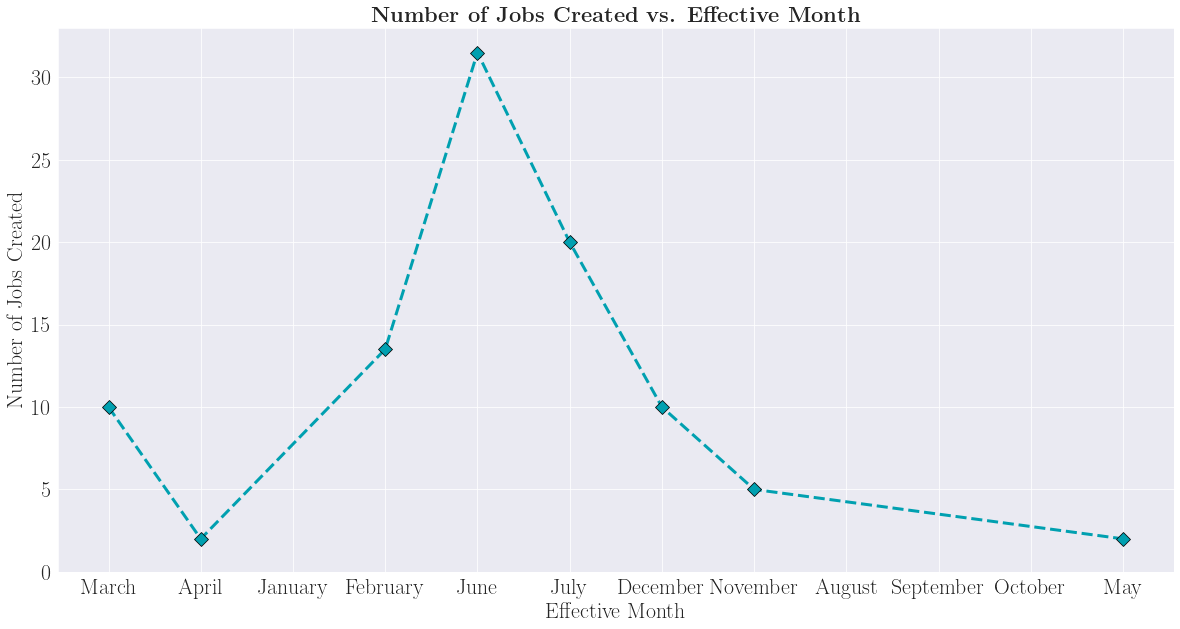

In [124]:
fig = plt.figure(figsize = (20,10))
sns.lineplot(data = vecsp_data, x = 'Effective Month', y = 'Job created', linewidth = 3, errorbar = None, marker = 'D',
             markersize = 10, mec = 'k', mfc = '#00a0b0', ls = '--', color = '#00a0b0')
plt.xlabel('Effective Month', fontsize = fs)
plt.ylabel('Number of Jobs Created', fontsize = fs)
plt.title(r'\bf{Number of Jobs Created vs. Effective Month}', fontsize = fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylim(0, None)

In [26]:
vecsp_data['Job created'].dropna()

29     10.0
37     60.0
95      5.0
120    12.0
137    10.0
325     2.0
353     2.0
414    15.0
432     3.0
433    20.0
445    10.0
Name: Job created, dtype: float64

In [127]:
vecsp_data.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA', 'email domains', 'Effective Month'],
      dtype='object')